In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [4]:
from path import *
from utils import *

In [58]:
from acoustic_measures import *
from plots import *

In [7]:
df_feat = pd.read_excel(feat_file) # daaframe with acoustic measures values

In [8]:
df_feat

,Unnamed: 0.1,SPK_id,Unnamed: 0,SES,SEX,AgeInDays,age_in_mois,SpeechType,vowels,duration,MinF0Hz,MaxF0Hz,meanF0Hz,f1_mean,f2_mean,f3_mean,f4_mean
0,10231,C083,10231,5,F,120,4,IDS,on,0.080625,267.005728,271.358561,269.635229,435.859100,905.886108,2016.684448,3215.907227
1,10232,C083,10232,5,F,120,4,IDS,a,0.118875,334.141502,418.112246,365.762249,733.240478,1998.356201,3124.705811,4457.481934
2,10233,C083,10233,5,F,120,4,IDS,on,0.370000,244.816960,272.745799,257.093232,581.523438,1800.463257,2705.837402,3537.889160
3,10234,C083,10234,5,F,120,4,IDS,au,0.130000,385.692754,399.961437,389.193664,522.594971,1729.905396,3019.603271,4110.695801
4,10235,C083,10235,5,F,120,4,IDS,in,0.103000,373.290302,399.362999,389.671290,591.096924,1545.306152,2429.643066,3449.245850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,9984,C080,9984,5,M,372,12,ADS,i,0.104688,157.204578,166.187323,161.020240,356.901184,2327.087402,3311.602539,4494.021973
10763,9985,C080,9985,5,M,372,12,ADS,an,0.068062,138.330594,143.016893,140.427588,501.899078,895.333252,2358.484863,3444.589844
10764,9986,C080,9986,5,M,372,12,ADS,ai,0.059500,156.527893,187.245213,170.191568,406.867371,1764.433594,2785.945313,3826.652588
10765,9987,C080,9987,5,M,372,12,ADS,a,0.081000,141.154354,148.879554,143.262969,719.794800,1481.318237,2832.031738,3997.157959


In [9]:
df_feat[df_feat['SpeechType'] == 'ADS']

,Unnamed: 0.1,SPK_id,Unnamed: 0,SES,SEX,AgeInDays,age_in_mois,SpeechType,vowels,duration,MinF0Hz,MaxF0Hz,meanF0Hz,f1_mean,f2_mean,f3_mean,f4_mean
26,10257,C083,10257,5,F,120,4,ADS,o,0.066437,313.643368,323.043195,318.876338,585.189026,1318.878540,2471.573730,3376.578857
27,10258,C083,10258,5,F,120,4,ADS,a,0.082187,277.502709,279.329997,278.566966,631.017883,1691.545166,3273.760742,4659.568359
28,10259,C083,10259,5,F,120,4,ADS,an,0.076125,250.864393,253.839799,252.131314,774.679016,1473.775757,3414.432617,4575.530273
29,10260,C083,10260,5,F,120,4,ADS,i,0.106313,214.113575,224.068005,219.948175,395.710846,2360.518311,3310.790283,4627.987305
30,10261,C083,10261,5,F,120,4,ADS,a,0.086375,226.114822,237.789709,229.572841,690.952209,2024.789795,3050.356445,4415.096191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,9984,C080,9984,5,M,372,12,ADS,i,0.104688,157.204578,166.187323,161.020240,356.901184,2327.087402,3311.602539,4494.021973
10763,9985,C080,9985,5,M,372,12,ADS,an,0.068062,138.330594,143.016893,140.427588,501.899078,895.333252,2358.484863,3444.589844
10764,9986,C080,9986,5,M,372,12,ADS,ai,0.059500,156.527893,187.245213,170.191568,406.867371,1764.433594,2785.945313,3826.652588
10765,9987,C080,9987,5,M,372,12,ADS,a,0.081000,141.154354,148.879554,143.262969,719.794800,1481.318237,2832.031738,3997.157959


In [10]:
np.max(df_feat['duration'])

2.6936875

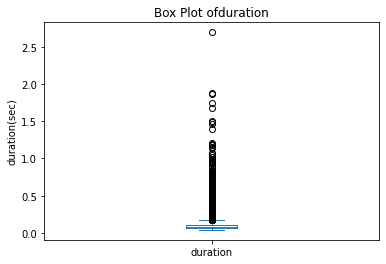

In [11]:
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'column_name': [...]})

# Plot the box plot for a specific column
df_feat['duration'].plot.box()
plt.title("Box Plot ofduration")
plt.ylabel("duration(sec)")
plt.show()

In [12]:
df_feat['duration'].quantile(0.90)

0.1586875

In [13]:
df_feat['duration'].quantile(0.75)

0.1064375

In [14]:
df_feat = df_feat[df_feat['duration'] <= 0.6].reset_index(drop=True)

In [57]:
df_feat

,Unnamed: 0.1,SPK_id,Unnamed: 0,SES,SEX,AgeInDays,age_in_mois,SpeechType,vowels,duration,MinF0Hz,MaxF0Hz,meanF0Hz,f1_mean,f2_mean,f3_mean,f4_mean
0,10231,C083,10231,5,F,120,4,IDS,on,0.080625,267.005728,271.358561,269.635229,435.859100,905.886108,2016.684448,3215.907227
1,10232,C083,10232,5,F,120,4,IDS,a,0.118875,334.141502,418.112246,365.762249,733.240478,1998.356201,3124.705811,4457.481934
2,10233,C083,10233,5,F,120,4,IDS,on,0.370000,244.816960,272.745799,257.093232,581.523438,1800.463257,2705.837402,3537.889160
3,10234,C083,10234,5,F,120,4,IDS,au,0.130000,385.692754,399.961437,389.193664,522.594971,1729.905396,3019.603271,4110.695801
4,10235,C083,10235,5,F,120,4,IDS,in,0.103000,373.290302,399.362999,389.671290,591.096924,1545.306152,2429.643066,3449.245850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,9984,C080,9984,5,M,372,12,ADS,i,0.104688,157.204578,166.187323,161.020240,356.901184,2327.087402,3311.602539,4494.021973
10667,9985,C080,9985,5,M,372,12,ADS,an,0.068062,138.330594,143.016893,140.427588,501.899078,895.333252,2358.484863,3444.589844
10668,9986,C080,9986,5,M,372,12,ADS,ai,0.059500,156.527893,187.245213,170.191568,406.867371,1764.433594,2785.945313,3826.652588
10669,9987,C080,9987,5,M,372,12,ADS,a,0.081000,141.154354,148.879554,143.262969,719.794800,1481.318237,2832.031738,3997.157959


In [55]:
df_feat[df_feat['SpeechType'] == 'ADS']

,Unnamed: 0.1,SPK_id,Unnamed: 0,SES,SEX,AgeInDays,age_in_mois,SpeechType,vowels,duration,MinF0Hz,MaxF0Hz,meanF0Hz,f1_mean,f2_mean,f3_mean,f4_mean
26,10257,C083,10257,5,F,120,4,ADS,o,0.066437,313.643368,323.043195,318.876338,585.189026,1318.878540,2471.573730,3376.578857
27,10258,C083,10258,5,F,120,4,ADS,a,0.082187,277.502709,279.329997,278.566966,631.017883,1691.545166,3273.760742,4659.568359
28,10259,C083,10259,5,F,120,4,ADS,an,0.076125,250.864393,253.839799,252.131314,774.679016,1473.775757,3414.432617,4575.530273
29,10260,C083,10260,5,F,120,4,ADS,i,0.106313,214.113575,224.068005,219.948175,395.710846,2360.518311,3310.790283,4627.987305
30,10261,C083,10261,5,F,120,4,ADS,a,0.086375,226.114822,237.789709,229.572841,690.952209,2024.789795,3050.356445,4415.096191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,9984,C080,9984,5,M,372,12,ADS,i,0.104688,157.204578,166.187323,161.020240,356.901184,2327.087402,3311.602539,4494.021973
10667,9985,C080,9985,5,M,372,12,ADS,an,0.068062,138.330594,143.016893,140.427588,501.899078,895.333252,2358.484863,3444.589844
10668,9986,C080,9986,5,M,372,12,ADS,ai,0.059500,156.527893,187.245213,170.191568,406.867371,1764.433594,2785.945313,3826.652588
10669,9987,C080,9987,5,M,372,12,ADS,a,0.081000,141.154354,148.879554,143.262969,719.794800,1481.318237,2832.031738,3997.157959


In [56]:
df_feat[df_feat['SpeechType'] == 'IDS']

,Unnamed: 0.1,SPK_id,Unnamed: 0,SES,SEX,AgeInDays,age_in_mois,SpeechType,vowels,duration,MinF0Hz,MaxF0Hz,meanF0Hz,f1_mean,f2_mean,f3_mean,f4_mean
0,10231,C083,10231,5,F,120,4,IDS,on,0.080625,267.005728,271.358561,269.635229,435.859100,905.886108,2016.684448,3215.907227
1,10232,C083,10232,5,F,120,4,IDS,a,0.118875,334.141502,418.112246,365.762249,733.240478,1998.356201,3124.705811,4457.481934
2,10233,C083,10233,5,F,120,4,IDS,on,0.370000,244.816960,272.745799,257.093232,581.523438,1800.463257,2705.837402,3537.889160
3,10234,C083,10234,5,F,120,4,IDS,au,0.130000,385.692754,399.961437,389.193664,522.594971,1729.905396,3019.603271,4110.695801
4,10235,C083,10235,5,F,120,4,IDS,in,0.103000,373.290302,399.362999,389.671290,591.096924,1545.306152,2429.643066,3449.245850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,9968,C080,9968,5,M,372,12,IDS,e,0.057563,217.034645,237.491597,225.390232,465.068634,2230.125732,3135.524414,4565.943848
10651,9969,C080,9969,5,M,372,12,IDS,a,0.064937,202.258173,215.942506,209.439306,766.921143,1541.845581,2888.515625,3755.958740
10653,9971,C080,9971,5,M,372,12,IDS,a,0.062562,250.129614,269.711474,261.490556,880.433044,2038.854370,3011.789063,4261.955566
10654,9972,C080,9972,5,M,372,12,IDS,i,0.128312,358.642800,409.754335,387.298421,450.867340,2087.462891,3688.905762,4882.791992


In [15]:
# subset feature dataframe for 10 target vowels and register
target_vowel_catg_9 = ['a', 'ai', 'e', 'eu', 'i', 'o', 'oe', 'ou', 'u']
df_feat_sub_ADS_9_vow = df_feat[(df_feat['SpeechType'] == 'ADS') & (df_feat['vowels'].isin(target_vowel_catg_9))].copy()
df_feat_sub_IDS_9_vow = df_feat[(df_feat['SpeechType'] == 'IDS') & (df_feat['vowels'].isin(target_vowel_catg_9))].copy()

In [16]:
np.max(df_feat_sub_ADS_9_vow['duration'])

0.5234375

In [17]:
np.max(df_feat_sub_IDS_9_vow['duration'])

0.599625

In [420]:
#ADS
# Calculate the first and third quartiles (Q1 and Q3)
#Q1 = df_feat_sub_ADS_9_vow['duration'].quantile(0.25)
#Q3 = df_feat_sub_ADS_9_vow['duration'].quantile(0.75)

# Calculate the interquartile range (IQR)
#IQR = Q3 - Q1

# Define the upper bounds for non-outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Remove outliers and create a new dataframe
#df_feat_sub_ADS_9_vow = df_feat_sub_ADS_9_vow[df_feat_sub_ADS_9_vow['duration'] <= upper_bound]

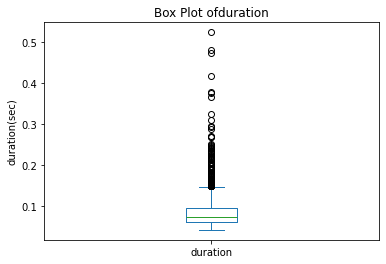

In [18]:
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'column_name': [...]})

# Plot the box plot for a specific column
df_feat_sub_ADS_9_vow['duration'].plot.box()
plt.title("Box Plot ofduration")
plt.ylabel("duration(sec)")
plt.show()

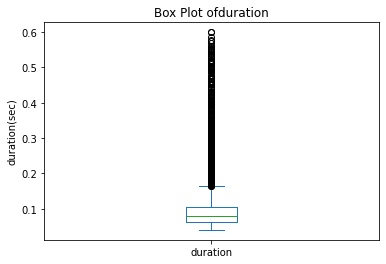

In [20]:
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'column_name': [...]})

# Plot the box plot for a specific column
df_feat_sub_IDS_9_vow['duration'].plot.box()
plt.title("Box Plot ofduration")
plt.ylabel("duration(sec)")
plt.show()

In [21]:
# subset feature dataframe for full area computation for target border vowels and register
target_vowel_catg_border = ["i", "e", "ai", "a", "o", "ou"]
df_feat_sub_ADS_border_vow = df_feat[(df_feat['SpeechType'] == 'ADS') & (df_feat['vowels'].isin(target_vowel_catg_border))].copy()
df_feat_sub_IDS_border_vow = df_feat[(df_feat['SpeechType'] == 'IDS') & (df_feat['vowels'].isin(target_vowel_catg_border))].copy()

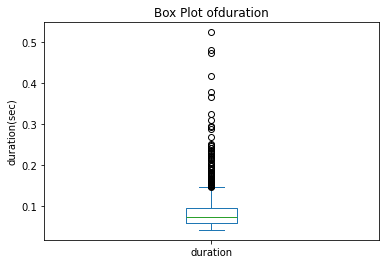

In [22]:
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'column_name': [...]})

# Plot the box plot for a specific column
df_feat_sub_ADS_border_vow['duration'].plot.box()
plt.title("Box Plot ofduration")
plt.ylabel("duration(sec)")
plt.show()

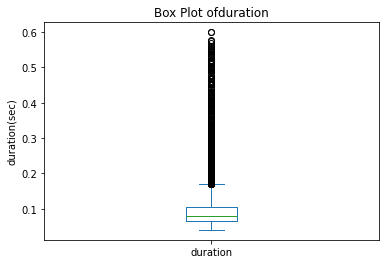

In [23]:
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'column_name': [...]})

# Plot the box plot for a specific column
df_feat_sub_IDS_border_vow['duration'].plot.box()
plt.title("Box Plot ofduration")
plt.ylabel("duration(sec)")
plt.show()

In [24]:
# subset feature dataframe for corner vowels area computation with 3 target corner vowels and register
target_vowel_catg_3 = ['a','i','ou']
df_feat_sub_ADS_3_vow = df_feat[(df_feat['SpeechType'] == 'ADS') & (df_feat['vowels'].isin(target_vowel_catg_3))].copy()
df_feat_sub_IDS_3_vow = df_feat[(df_feat['SpeechType'] == 'IDS') & (df_feat['vowels'].isin(target_vowel_catg_3))].copy()

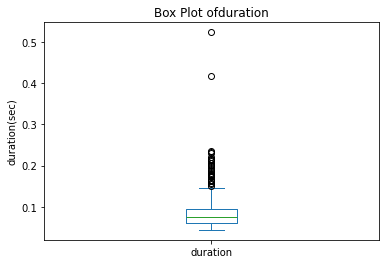

In [25]:
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'column_name': [...]})

# Plot the box plot for a specific column
df_feat_sub_ADS_3_vow['duration'].plot.box()
plt.title("Box Plot ofduration")
plt.ylabel("duration(sec)")
plt.show()

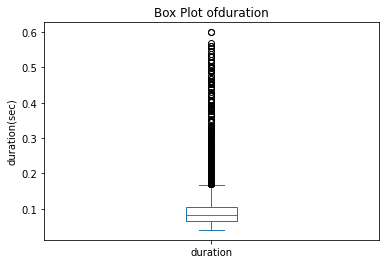

In [26]:
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'column_name': [...]})

# Plot the box plot for a specific column
df_feat_sub_IDS_3_vow['duration'].plot.box()
plt.title("Box Plot ofduration")
plt.ylabel("duration(sec)")
plt.show()

# extract acoustic measures

In [27]:
# pitch(st)
df_ADS_with_pitch_st = pitch_in_st(df_feat_sub_ADS_9_vow, 'meanF0Hz','meanF0st', ref_in_Hz=10)
df_IDS_with_pitch_st = pitch_in_st(df_feat_sub_IDS_9_vow, 'meanF0Hz', 'meanF0st',ref_in_Hz=10)

In [28]:
# range (st)
df_ADS_with_range_st = range_in_st(df_feat_sub_ADS_9_vow, 'MinF0Hz', 'MaxF0Hz', 'RangeF0st', ref_in_Hz=10)
df_IDS_with_range_st = range_in_st(df_feat_sub_IDS_9_vow, 'MinF0Hz', 'MaxF0Hz', 'RangeF0st', ref_in_Hz=10)

In [29]:
# duration (ms)
df_ADS_with_dur_ms = duration_in_ms(df_feat_sub_ADS_9_vow, 'duration', 'duration_ms')
df_IDS_with_dur_ms = duration_in_ms(df_feat_sub_IDS_9_vow, 'duration', 'duration_ms')

In [30]:
# exrractin required col form each measure dataframes
req_col_pitch = ['SPK_id', 'SES', 'SEX', 'AgeInDays', 'vowels', 'meanF0st']
req_col_range = ['SPK_id', 'SES', 'SEX', 'AgeInDays', 'vowels', 'RangeF0st']
req_col_dur = ['SPK_id', 'SES', 'SEX', 'AgeInDays', 'vowels', 'duration_ms']


In [31]:
#subset measure dataframe for req col
df_ADS_with_pitch_st_sub = df_ADS_with_pitch_st[req_col_pitch].copy().reset_index(drop=True)
df_IDS_with_pitch_st_sub = df_IDS_with_pitch_st[req_col_pitch].copy().reset_index(drop=True)

df_ADS_with_range_st_sub = df_ADS_with_range_st[req_col_range].copy().reset_index(drop=True)
df_IDS_with_range_st_sub = df_IDS_with_range_st[req_col_range].copy().reset_index(drop=True)

df_ADS_with_dur_ms_sub = df_ADS_with_dur_ms[req_col_dur].copy().reset_index(drop=True)
df_IDS_with_dur_ms_sub = df_IDS_with_dur_ms[req_col_dur].copy().reset_index(drop=True)


In [32]:
# saving measures df in excel format
df_ADS_with_pitch_st_sub.to_excel(os.path.join(acoustic_measures_dir, 'ADS_pitch_st.xlsx'))
df_IDS_with_pitch_st_sub.to_excel(os.path.join(acoustic_measures_dir, 'IDS_pitch_st.xlsx'))

df_ADS_with_range_st_sub.to_excel(os.path.join(acoustic_measures_dir, 'ADS_range_st.xlsx'))
df_IDS_with_range_st_sub.to_excel(os.path.join(acoustic_measures_dir, 'IDS_range_st.xlsx'))

df_ADS_with_dur_ms_sub.to_excel(os.path.join(acoustic_measures_dir, 'ADS_dur_ms.xlsx'))
df_IDS_with_dur_ms_sub.to_excel(os.path.join(acoustic_measures_dir, 'IDS_dur_ms.xlsx'))

##### extracting vowel based measures

In [33]:
# vowel space expansion
# full
df_ADS_area_full = vowel_space_expansion(df_feat_sub_ADS_border_vow, ['SPK_id', 'AgeInDays'], 'vowels', ['f1_mean', 'f2_mean'])
df_IDS_area_full = vowel_space_expansion(df_feat_sub_IDS_border_vow, ['SPK_id', 'AgeInDays'], 'vowels', ['f1_mean', 'f2_mean'])

#corner
df_ADS_area_cor = vowel_space_expansion(df_feat_sub_ADS_3_vow, ['SPK_id', 'AgeInDays'], 'vowels', ['f1_mean', 'f2_mean'])
df_IDS_area_cor = vowel_space_expansion(df_feat_sub_IDS_3_vow, ['SPK_id', 'AgeInDays'], 'vowels', ['f1_mean', 'f2_mean'])

Skipping speaker C045, age 430 due to number of categories less than number of features.
Skipping speaker C061, age 396 due to number of categories less than number of features.
Skipping speaker C065, age 146 due to number of categories less than number of features.
Skipping speaker C072, age 130 due to number of categories less than number of features.
Skipping speaker C09, age 368 due to number of categories less than number of features.
Convex hull areas have been saved
Convex hull areas have been saved
Skipping speaker C028, age 140 due to number of categories less than number of features.
Skipping speaker C035, age 143 due to number of categories less than number of features.
Skipping speaker C035, age 282 due to number of categories less than number of features.
Skipping speaker C035, age 374 due to number of categories less than number of features.
Skipping speaker C045, age 430 due to number of categories less than number of features.
Skipping speaker C053, age 262 due to numbe

In [34]:
df_ADS_var = vowel_variability(df_feat_sub_ADS_9_vow, ['SPK_id', 'AgeInDays', 'vowels'], ['f1_mean', 'f2_mean'])
df_IDS_var = vowel_variability(df_feat_sub_IDS_9_vow, ['SPK_id', 'AgeInDays', 'vowels'], ['f1_mean', 'f2_mean'])

Skipping speaker C023, age 251, category a due to less than 3 samples.
Skipping speaker C023, age 251, category ai due to less than 3 samples.
Skipping speaker C023, age 251, category e due to less than 3 samples.
Skipping speaker C023, age 251, category i due to less than 3 samples.
Skipping speaker C023, age 251, category oe due to less than 3 samples.
Skipping speaker C023, age 251, category ou due to less than 3 samples.
Skipping speaker C028, age 140, category a due to less than 3 samples.
Skipping speaker C028, age 140, category ai due to less than 3 samples.
Skipping speaker C028, age 140, category e due to less than 3 samples.
Skipping speaker C028, age 140, category o due to less than 3 samples.
Skipping speaker C028, age 140, category u due to less than 3 samples.
Skipping speaker C028, age 287, category eu due to less than 3 samples.
Skipping speaker C028, age 287, category i due to less than 3 samples.
Skipping speaker C028, age 287, category o due to less than 3 samples.
S

#### Vowel distinctiveness

In [35]:
# omiiting cat y as not very distinct with i for Vowel distinctiveness
# subset feature dataframe for 10 target vowels and register
target_vowel_catg_8 = ['a', 'ai', 'e', 'eu', 'i', 'o', 'oe', 'ou']
df_feat_sub_ADS_8_vow = df_feat[(df_feat['SpeechType'] == 'ADS') & (df_feat['vowels'].isin(target_vowel_catg_8))].copy()
df_feat_sub_IDS_8_vow = df_feat[(df_feat['SpeechType'] == 'IDS') & (df_feat['vowels'].isin(target_vowel_catg_8))].copy()

In [36]:
df_ADS_dist = vowel_distinctiveness(df_feat_sub_ADS_8_vow, ['SPK_id', 'AgeInDays'], 'vowels', ['f1_mean', 'f2_mean'])
df_IDS_dist = vowel_distinctiveness(df_feat_sub_IDS_8_vow, ['SPK_id', 'AgeInDays'], 'vowels', ['f1_mean', 'f2_mean'])

Skipping participant C045, age 430 due to no valid vowel groups.
Skipping participant C054, age 480 due to no valid vowel groups.
Skipping participant C061, age 396 due to no valid vowel groups.
Skipping participant C072, age 130 due to no valid vowel groups.
Skipping participant C083, age 302 due to no valid vowel groups.
Skipping participant C09, age 368 due to no valid vowel groups.
Distinctiveness has been saved
Distinctiveness has been saved


##### Adding require columns and Saving all vowel based measures 

In [37]:
#Area
# Select relevant columns from the main dataframe (df_feat_sub_ADS_border_vow)
df_relevant_ADS_Area_full = df_feat_sub_ADS_border_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()
df_relevant_IDS_Area_full = df_feat_sub_IDS_border_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()

df_relevant_ADS_Area_cor = df_feat_sub_ADS_3_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()
df_relevant_IDS_Area_cor = df_feat_sub_IDS_3_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()

#Merge columns
df_ADS_area_full_merg = pd.merge(df_ADS_area_full, df_relevant_ADS_Area_full , on='SPK_id', how='left')
df_IDS_area_full_merg = pd.merge(df_IDS_area_full, df_relevant_IDS_Area_full , on='SPK_id', how='left')

df_ADS_area_cor_merg = pd.merge(df_ADS_area_cor, df_relevant_ADS_Area_cor , on='SPK_id', how='left')
df_IDS_area_cor_merg = pd.merge(df_IDS_area_cor, df_relevant_IDS_Area_cor , on='SPK_id', how='left')

#rearrange columns
df_ADS_area_full_re_col = df_ADS_area_full_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'ConvexHullArea']]
df_IDS_area_full_re_col = df_IDS_area_full_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'ConvexHullArea']]

df_ADS_area_cor_re_col = df_ADS_area_cor_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'ConvexHullArea']]
df_IDS_area_cor_re_col = df_IDS_area_cor_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'ConvexHullArea']]

In [38]:
# Variability 
# Select relevant columns from the main dataframe (df_feat_sub_ADS_9_vow)
df_relevant_ADS_var = df_feat_sub_ADS_9_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()
df_relevant_IDS_var = df_feat_sub_IDS_9_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()

#Merge columns
df_ADS_var_merg = pd.merge(df_ADS_var, df_relevant_ADS_var , on='SPK_id', how='left')
df_IDS_var_merg = pd.merge(df_IDS_var, df_relevant_IDS_var , on='SPK_id', how='left')

#rearrange columns
df_ADS_var_re_col = df_ADS_var_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'vowels', 'no_Samples', 'variability']]
df_IDS_var_re_col = df_IDS_var_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'vowels', 'no_Samples', 'variability']]



In [39]:
#Distinctiveness
# Select relevant columns from the main dataframe (df_feat_sub_ADS_8_vow)
df_relevant_ADS_dist = df_feat_sub_ADS_8_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()
df_relevant_IDS_dist = df_feat_sub_IDS_8_vow[['SPK_id', 'SES', 'SEX']].drop_duplicates()

#Merge columns
df_ADS_dist_merg = pd.merge(df_ADS_dist, df_relevant_ADS_dist , on='SPK_id', how='left')
df_IDS_dist_merg = pd.merge(df_IDS_dist, df_relevant_IDS_dist , on='SPK_id', how='left')

#rearrange columns
df_ADS_dist_re_col = df_ADS_dist_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'Vowel_Dist']]
df_IDS_dist_re_col = df_IDS_dist_merg[['SPK_id', 'AgeInDays', 'SES', 'SEX', 'Vowel_Dist']]

In [40]:
# Save all measures
#Area
df_ADS_area_full_re_col.to_excel(os.path.join(acoustic_measures_dir, 'ADS_area_full.xlsx')) 
df_IDS_area_full_re_col.to_excel(os.path.join(acoustic_measures_dir, 'IDS_area_full.xlsx'))

df_ADS_area_cor_re_col.to_excel(os.path.join(acoustic_measures_dir, 'ADS_area_cor.xlsx'))
df_IDS_area_cor_re_col.to_excel(os.path.join(acoustic_measures_dir, 'IDS_area_cor.xlsx'))

#Variability
df_ADS_var_re_col.to_excel(os.path.join(acoustic_measures_dir, 'ADS_var.xlsx'))
df_IDS_var_re_col.to_excel(os.path.join(acoustic_measures_dir, 'IDS_var.xlsx'))

#Distinctiveness
df_ADS_dist_re_col.to_excel(os.path.join(acoustic_measures_dir, 'ADS_dist.xlsx')) 
df_IDS_dist_re_col.to_excel(os.path.join(acoustic_measures_dir, 'IDS_dist.xlsx'))

#### Plots vowel based meassures for a particular speaker and age

In [41]:
colors = {
    'i': 'green',      # Using green from base dictionary
    'e': 'purple',     # Assigning new color for 'e'
    'ai': 'orange',    # Assigning new color for 'ai'
    'a': 'blue',       # Using blue from base dictionary
    'o': 'cyan',       # Assigning new color for 'o'
    'ou': 'red'       # Assigning new color for 'ou'
}

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_VowelSpaceArea_6_C028_287.pdf


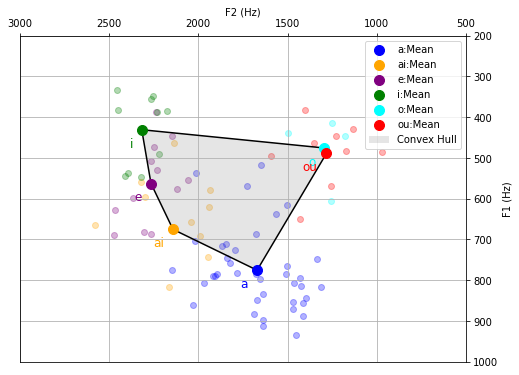

In [42]:
plot_convex_hull(df_feat_sub_IDS_border_vow, 'C028', 287, 'SPK_id', 'AgeInDays', 'vowels', ['f1_mean', 'f2_mean'], colors, Register= 'IDS', save_dir =plot_vow_measures_dir)

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\ADS_VowelSpaceArea_6_C028_287.pdf


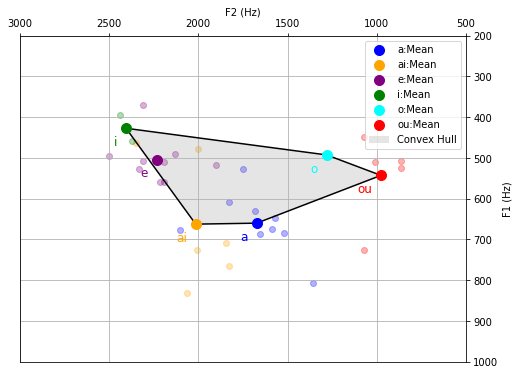

In [43]:
plot_convex_hull(df_feat_sub_ADS_border_vow, 'C028', 287, 'SPK_id', 'AgeInDays', 'vowels', ['f1_mean', 'f2_mean'], colors, Register= 'ADS', save_dir =plot_vow_measures_dir)

In [44]:
colors = {'a': 'blue', 'i': 'green', 'ou': 'red'}

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_VowelSpaceArea_3_C028_287.pdf


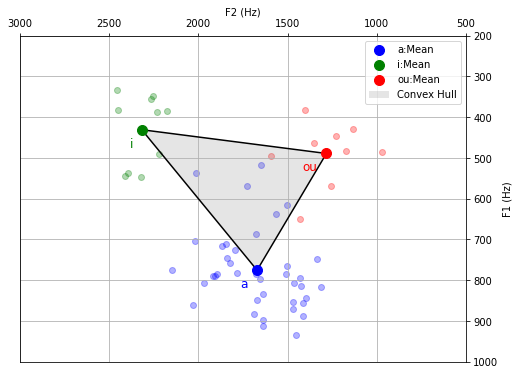

In [45]:
plot_convex_hull(df_feat_sub_IDS_3_vow, 'C028', 287, 'SPK_id', 'AgeInDays', 'vowels', ['f1_mean', 'f2_mean'], colors, Register= 'IDS',save_dir = plot_vow_measures_dir)

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\ADS_VowelSpaceArea_3_C028_287.pdf


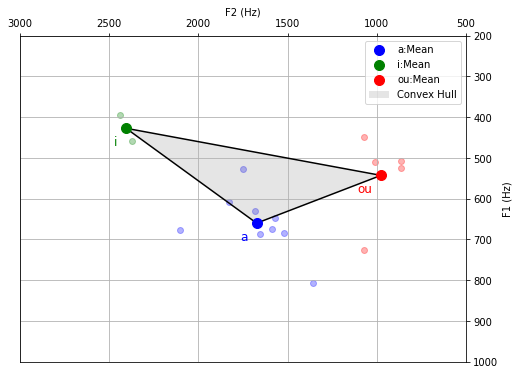

In [46]:
plot_convex_hull(df_feat_sub_ADS_3_vow, 'C028', 287, 'SPK_id', 'AgeInDays', 'vowels', ['f1_mean', 'f2_mean'], colors, Register= 'ADS',save_dir = plot_vow_measures_dir)

In [47]:
colors = {
    'a': 'blue',       # Blue
    'ai': 'orange',    # Orange
    'e': 'purple',     # Purple
    'eu': 'brown',     # New color for 'eu'
    'i': 'green',      # Green
    'o': 'cyan',       # Cyan
    'oe': 'pink',      # New color for 'oe'
    'ou': 'red',       # Red
    'u': 'magenta'     # New color for 'u'
}


Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Ellipse_C028_287.pdf and c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Ellipse_C028_287.jpg


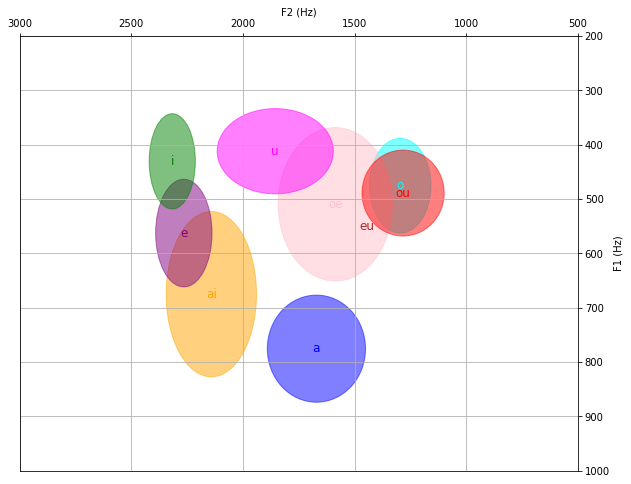

In [48]:
plot_vowel_ellipses(df_feat_sub_IDS_9_vow, 'C028', 287, 'SPK_id', 'AgeInDays', 'vowels', ['f1_mean', 'f2_mean'],colors, Register= 'IDS',save_dir = plot_vow_measures_dir)

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\ADS_Ellipse_C028_287.pdf and c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\ADS_Ellipse_C028_287.jpg


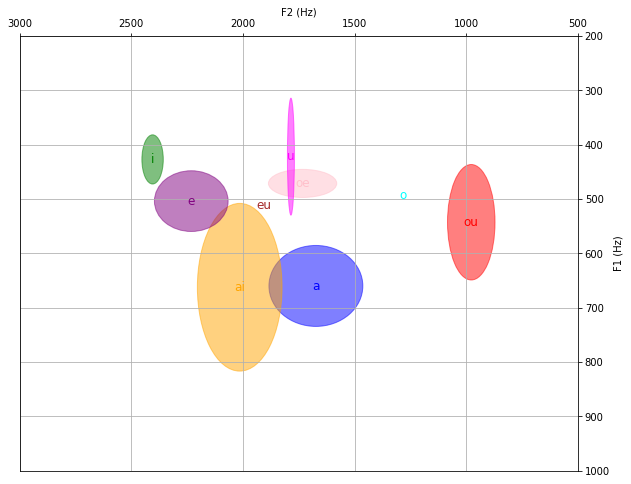

In [49]:
plot_vowel_ellipses(df_feat_sub_ADS_9_vow, 'C028', 287, 'SPK_id', 'AgeInDays', 'vowels', ['f1_mean', 'f2_mean'],colors, Register= 'ADS',save_dir = plot_vow_measures_dir)

In [50]:
req_cat = ['a', 'ai', 'i', 'ou']

In [59]:
colors = {
    'a': 'blue',
    'ai': 'orange',
    'i': 'green',
    'ou': 'red'
}

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Distinctiveness_C028_287.pdf and c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Distinctiveness_C028_287.jpg


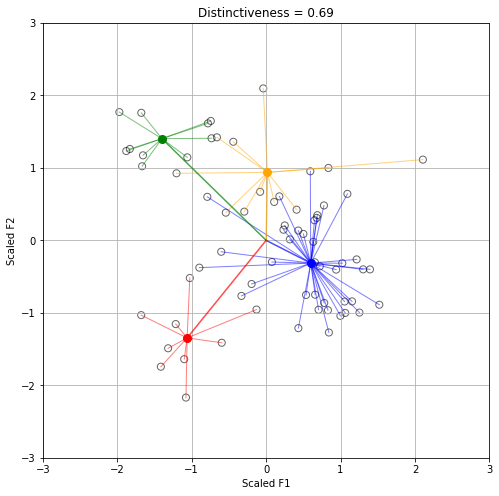

In [60]:
plot_vowel_distinctiveness(df_feat_sub_IDS_8_vow,'C028', 287, 'SPK_id', 'AgeInDays', 'vowels', 'f1_mean', 'f2_mean',colors, req_cat=req_cat, Register= 'IDS',save_dir = plot_vow_measures_dir)

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Distinctiveness_C052_131.pdf and c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Distinctiveness_C052_131.jpg


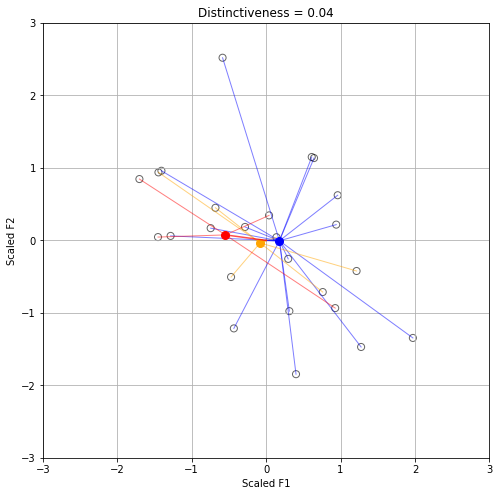

In [61]:
plot_vowel_distinctiveness(df_feat_sub_IDS_8_vow,'C052', 131, 'SPK_id', 'AgeInDays', 'vowels', 'f1_mean', 'f2_mean',colors, req_cat=req_cat, Register= 'IDS',save_dir = plot_vow_measures_dir)

Plot saved as c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Distinctiveness_C068_256.pdf and c:\Users\arunps\OneDrive\Projects\Scripts\Python\French_IDS_ADS_DayLong_recordings\plot_acoustic_measures\IDS_Distinctiveness_C068_256.jpg


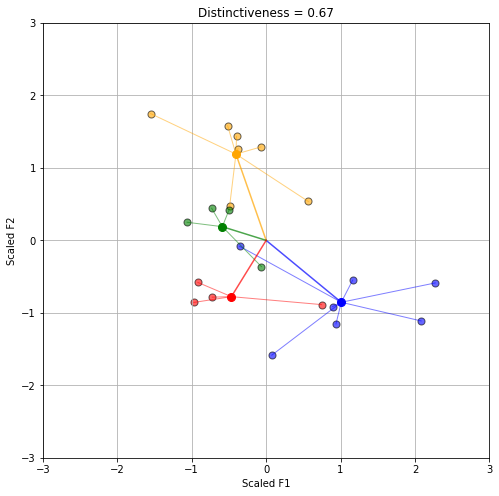

In [54]:
plot_vowel_distinctiveness(df_feat_sub_IDS_8_vow,'C068', 256, 'SPK_id', 'AgeInDays', 'vowels', 'f1_mean', 'f2_mean',colors, req_cat=req_cat, Register= 'IDS',save_dir = plot_vow_measures_dir)